# Unlocking the Starbucks Strategy
### Group Project by CTE

In [1]:
%matplotlib inline

# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from census import Census

In [2]:
# Load Original Raw Starbucks File
starbucks_data_to_load = "data/Starbucks Locations Data.csv"

# Read the data into dataframe
star_df = pd.read_csv(starbucks_data_to_load)

# Print the length (record count) and head for reference / debugging
#print(len(star_df))
#star_df.head()

## US Starbucks Analysis

In [3]:
# Create new dataset for just data located in US
star_filter_df = star_df.loc[star_df["Country"] == "US", :]

# Make a copy of the file to make it independent from previous data frames
star_us_df = star_filter_df.copy() 

# Change Zip Code format to string so that it can preserve leading zeros ... pad with leading zeros
star_us_df["Zip Code"] = star_us_df["Zip Code"].astype(int)
star_us_df["Zip Code"] = star_us_df["Zip Code"].astype(str)
star_us_df["Zip Code"] = star_us_df["Zip Code"].apply('{:0>5}'.format)

# Reset Index / Sort by Zip
star_us_df.reset_index(inplace=True)

# Export combined data for practice and outside confirmation of results
star_us_df.to_csv('Data/Starbucks US.csv', index=False)

# Print the length (record count) and head for reference / debugging
#star_us_df.dtypes
#print(len(star_us_df))
#star_us_df.head()

# Save total us locations for later (pie charts)
total_locations_us = len(star_us_df)
#print(total_locations_us)

## US Starbucks by Zip Code

In [4]:
############################################################
#   Group data based on zip code to get counts per zip     #
#   Data will be merged into master zipcode data set       #
############################################################

star_zipcode_df = star_us_df.groupby(["Zip Code"]).agg({"Brand": "count"})
star_zipcode_df .sort_values("Zip Code")
star_zipcode_df.reset_index(inplace=True)

# Rename columns
star_zipcode_df.rename(inplace=True, columns={
    "Brand": "Count Starbucks"})

# Export combined data for practice and outside confirmation of results
star_zipcode_df.to_csv('Data/Starbucks Zip Code Count.csv', index=False)

# Print the length (record count) and head for reference / debugging
#print(len(star_zipcode_df))
#star_zipcode_df.head()

## US Starbucks by State

In [5]:
############################################################
#   Group data based on state to get counts per state      #
############################################################

star_state_df = star_us_df.groupby(["State/Province"]).agg({"Brand": "count"})
# Rename columns
star_state_df.rename(inplace=True, columns={
    "Brand": "Count Starbucks"})

# Modify Sort Order
star_state_df = star_state_df.sort_values(by=("Count Starbucks"), ascending=False)
star_state_df.reset_index(inplace=True)

# Reduce data frame to the top 10 records
star_state_df = star_state_df.head(10)

# Takes sum for later use (pie charts)
total_locations_top_state = star_state_df["Count Starbucks"].sum()

# Print the length (record count) and head for reference / debugging
#print(len(star_state_df))
#print(total_locations_top_state)
#star_state_df.head()

## Top 10 States - Bar Chart

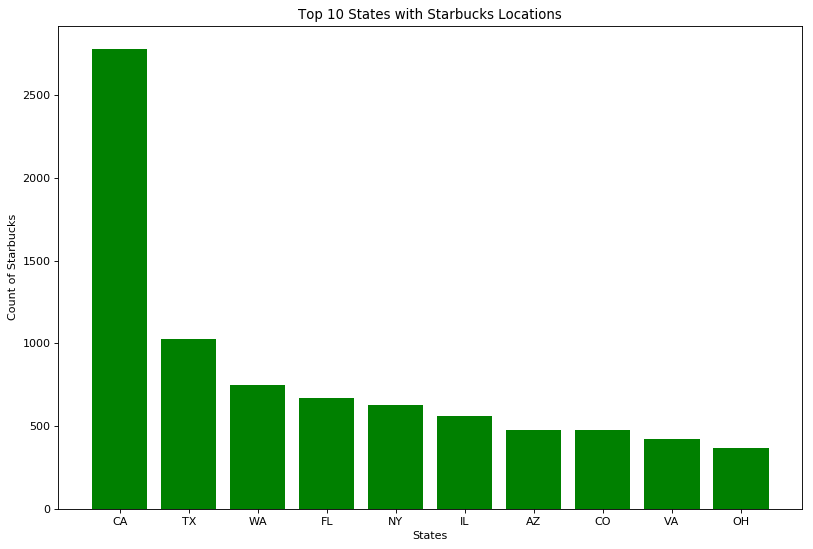

In [6]:
# size figure prior to adding data
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

# Build Chart
plt.title("Top 10 States with Starbucks Locations")
plt.xlabel("States")
plt.ylabel("Count of Starbucks")

# Setup x axis
x_axis = np.arange(len(star_state_df))

# Create a bar chart based upon the above data
plt.bar(x_axis, star_state_df["Count Starbucks"], color="g", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, star_state_df["State/Province"])

# Display chart
plt.show()

## Top 10 States - Pie Chart

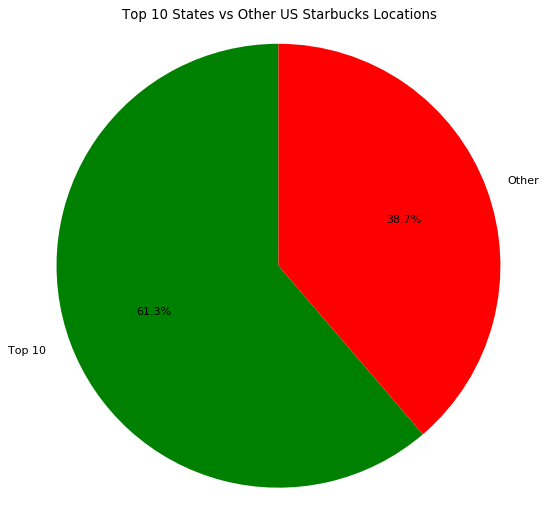

In [7]:
# Create Label Categories and Data Values
label = ["Top 10 ", "Other"]
value = [(total_locations_top_state / total_locations_us), ((total_locations_us - total_locations_top_state) / total_locations_us) ]
colors = ["green", "red"]
explode = (0.0, 0)

# size figure prior to adding data
fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

# add data to pie chart
plt.title("Top 10 States vs Other US Starbucks Locations")
plt.pie(value, explode=explode, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.axis("equal")
plt.show()

## US Starbucks by City

In [8]:
############################################################
#   Group data based on city to get counts per city        #
############################################################

star_city_df = star_us_df.groupby(by=["City"]).agg({"Brand": "count"})
# Rename columns
star_city_df.rename(inplace=True, columns={
    "Brand": "Count Starbucks"})

# Modify Sort Order
star_city_df = star_city_df.sort_values(by=("Count Starbucks"), ascending=False)
star_city_df.reset_index(inplace=True)

# Reduce data frame to the top 10 records
star_city_df = star_city_df.head(10)

# Takes sum for later use (pie charts)
total_locations_top_city = star_city_df["Count Starbucks"].sum()

# Print the length (record count) and head for reference / debugging
#print(len(star_city_df))
#print(total_locations_top_city)
#star_city_df.head()

## Top 10 Cities - Bar Chart

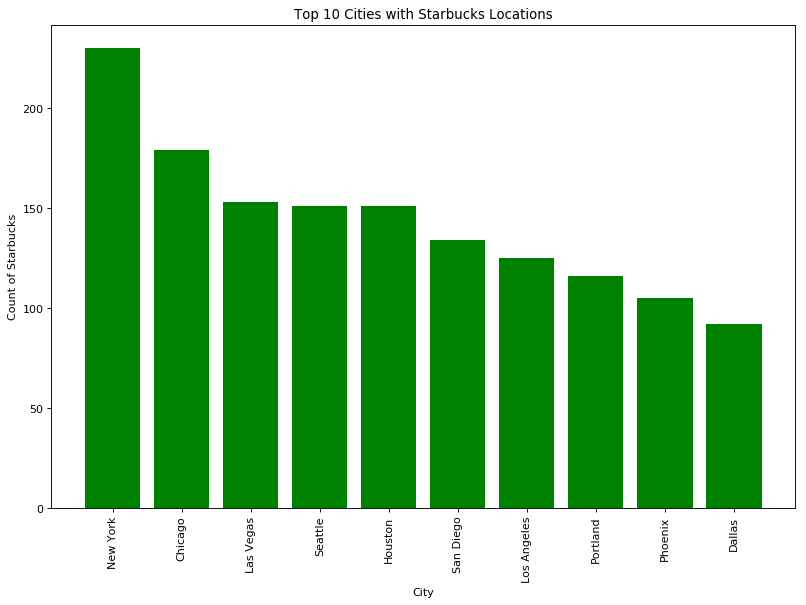

In [9]:
# size figure prior to adding data
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

# Build Chart
plt.title("Top 10 Cities with Starbucks Locations")
plt.xlabel("City")
plt.ylabel("Count of Starbucks")

# Setup x axis
x_axis = np.arange(len(star_city_df))

# Create a bar chart based upon the above data
plt.bar(x_axis, star_city_df["Count Starbucks"], color="g", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, star_city_df["City"], rotation=90)

# Display chart
plt.show()

## Top 10 Cities - Pie Chart

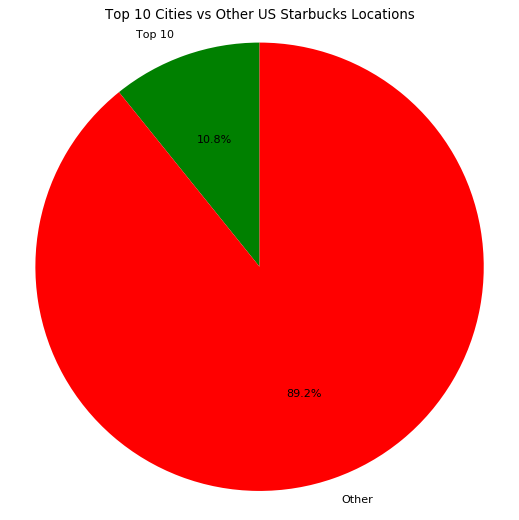

In [10]:
# Create Label Categories and Data Values
label = ["Top 10 ", "Other"]
value = [(total_locations_top_city / total_locations_us), ((total_locations_us - total_locations_top_city) / total_locations_us) ]
colors = ["green", "red"]
explode = (0.0, 0)

# size figure prior to adding data
fig=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')

# add data to pie chart
plt.title("Top 10 Cities vs Other US Starbucks Locations")
plt.pie(value, explode=explode, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.axis("equal")
plt.show()

## Florida Starbucks Analysis

In [11]:
# Files to Load
census_data_load = 'data/Census Data.csv'
starbucks_count_load = 'data/Starbucks Zip Code Count.csv'

# Read School and Student Data File and store into Pandas Data Frames
census_data = pd.read_csv(census_data_load)
starbucks_count = pd.read_csv(starbucks_count_load)

# Combine the data into a single dataset
combined_starbucks = pd.merge(census_data, starbucks_count, how = 'left', on = ['Zip Code']).fillna(0)


# Display the data table for preview
combined_starbucks.head()

,Zip Code,State,Population,Median Age,Per Capita Income,Poverty Count,Count Starbucks
0,1001,MA,17423,45.0,30430,1462,0.0
1,1002,MA,29970,23.2,26072,8351,0.0
2,1003,MA,11296,19.9,3829,54,0.0
3,1005,MA,5228,44.1,32169,230,0.0
4,1007,MA,14888,42.5,36359,1410,0.0


## Florida Rundown

In [12]:
# Create data series of FL Starbucks locations
FL_starbucks = combined_starbucks[(combined_starbucks['State'] == 'FL')].reset_index(drop=True)
FL_starbucks['% Poverty Rate'] = ((FL_starbucks['Poverty Count'] / FL_starbucks['Population'])*100).map("{:,.2f}".format)

# Calculate the totals, averages and rates
fl_tot_zip = FL_starbucks['Zip Code'].count()
fl_tot_pop = FL_starbucks['Population'].sum()
fl_avg_median_age = ((FL_starbucks['Population']*FL_starbucks['Median Age']).sum())/fl_tot_pop
fl_avg_per_capita_inc = ((FL_starbucks['Population']*FL_starbucks['Per Capita Income']).sum())/fl_tot_pop
fl_poverty_rate = (FL_starbucks['Poverty Count'].sum() / FL_starbucks['Population'].sum())*100
fl_tot_starbucks = FL_starbucks['Count Starbucks'].sum()

# Create FL rundown data frame
FL_rundown = pd.DataFrame({"Total Zip Codes": [fl_tot_zip], 
                           "Total Population": [fl_tot_pop], 
                           "Median Age": [fl_avg_median_age],
                           "Average Per Capita Income": [fl_avg_per_capita_inc], 
                           "% Poverty Rate": [fl_poverty_rate],
                           "Total Starbucks": [fl_tot_starbucks]})

# Format data
FL_rundown["Total Population"] = FL_rundown["Total Population"].map("{:,}".format)
FL_rundown["Median Age"] = FL_rundown["Median Age"].map("{:,.2f}".format)
FL_rundown["Average Per Capita Income"] = FL_rundown["Average Per Capita Income"].map("${:,.2f}".format)
FL_rundown["% Poverty Rate"] = FL_rundown["% Poverty Rate"].map("{:,.2f}".format)

FL_rundown

,Total Zip Codes,Total Population,Median Age,Average Per Capita Income,% Poverty Rate,Total Starbucks
0,969,"19,932,688",42.06,"$27,598.07",15.75,660.0


## Florida Top 5 Zip Codes

In [13]:
# Sort and show top 5 cities based on Starbucks totals
top_FL_starbucks = FL_starbucks.sort_values(["Count Starbucks"], ascending=False).reset_index(drop=True)
top_FL_starbucks = top_FL_starbucks[["Zip Code", "Population", "Median Age", "Per Capita Income", "Poverty Count", "Count Starbucks"]]
top_FL_starbucks.set_index('Zip Code', inplace = True)
del top_FL_starbucks.index.name
top_FL_starbucks.head(5)

,Population,Median Age,Per Capita Income,Poverty Count,Count Starbucks
33607,25103,35.7,23329,7013,11.0
32819,27620,40.4,39575,3057,11.0
33139,38027,39.7,56281,6118,8.0
33511,54641,35.8,27653,5874,6.0
32830,11,63.3,35091,0,6.0


## Greater Orlando

In [14]:
# File to Load
greater_orlando_zip_load = "data/Orlando Area Zip Code Data.csv"

# Read data File and store into data frame
greater_orlando_zip = pd.read_csv(greater_orlando_zip_load)

# Combine the data
greater_orlando_starbucks = pd.merge(greater_orlando_zip, FL_starbucks, how = 'left', on = ['Zip Code'])
greater_orlando_starbucks.drop(["State", "Poverty Count"], axis=1, inplace=True)

greater_orlando_starbucks["% Poverty Rate"] = greater_orlando_starbucks["% Poverty Rate"].astype('float64')

greater_orlando_starbucks.sort_values(["Count Starbucks"], ascending=False)

,Zip Code,Area,Population,Median Age,Per Capita Income,Count Starbucks,% Poverty Rate
45,32819,Orlando,27620,40.4,39575,11.0,11.07
55,32830,Orlando,11,63.3,35091,6.0,0.00
47,32821,Orlando,16870,32.8,25535,5.0,17.59
52,32827,Orlando,8953,37.0,38298,5.0,5.08
19,32765,Oviedo,61426,33.4,29809,4.0,10.94
62,32839,Orlando,51706,30.8,17150,3.0,24.03
29,32792,Winter Park,51397,34.8,26900,3.0,18.58
77,34747,Celebration,16598,37.1,34430,3.0,12.54
9,32714,Altamonte Springs,35011,38.1,27717,3.0,14.15
53,32828,Alafaya,63788,32.1,26849,3.0,16.11


## Greater Orlando Starbucks by Area

In [15]:
# Calculate Area Totals
greater_orlando_by_area = greater_orlando_starbucks.copy()
greater_orlando_by_area.drop("Zip Code", axis = 1, inplace=True)
greater_orlando_by_area["Median Age"] = greater_orlando_by_area["Population"] * greater_orlando_starbucks["Median Age"]
greater_orlando_by_area["Per Capita Income"] = greater_orlando_by_area["Population"] * greater_orlando_starbucks["Per Capita Income"]
greater_orlando_by_area["% Poverty Rate"] = greater_orlando_by_area["Population"] * greater_orlando_starbucks["% Poverty Rate"]

greater_orlando_by_area = greater_orlando_by_area.groupby(["Area"]).sum()
del greater_orlando_by_area.index.name
greater_orlando_by_area["Median Age"] = greater_orlando_by_area["Median Age"] / greater_orlando_by_area["Population"]
greater_orlando_by_area["Per Capita Income"] = greater_orlando_by_area["Per Capita Income"] / greater_orlando_by_area["Population"]
greater_orlando_by_area["% Poverty Rate"] = greater_orlando_by_area["% Poverty Rate"] / greater_orlando_by_area["Population"]

# Format data
greater_orlando_by_area["Population"] = greater_orlando_by_area["Population"].map("{:,}".format)
greater_orlando_by_area["Median Age"] = greater_orlando_by_area["Median Age"].map("{:,.2f}".format)
greater_orlando_by_area["Per Capita Income"] = greater_orlando_by_area["Per Capita Income"].map("${:,.2f}".format)
greater_orlando_by_area["% Poverty Rate"] = greater_orlando_by_area["% Poverty Rate"].map("{:,.2f}".format)

greater_orlando_by_area.sort_values(["Count Starbucks"], ascending=False)

,Population,Median Age,Per Capita Income,Count Starbucks,% Poverty Rate
Orlando,"627,809",34.80,"$26,317.75",45.0,17.12
Winter Park,"76,542",37.43,"$37,111.81",6.0,15.36
Altamonte Springs,"57,080",40.34,"$28,396.70",5.0,13.43
Oviedo,"78,125",34.17,"$30,502.40",4.0,9.86
Alafaya,"63,788",32.10,"$26,849.00",3.0,16.11
Casselberry,"35,511",39.20,"$24,460.00",3.0,13.27
Celebration,"16,598",37.10,"$34,430.00",3.0,12.54
Kissimmee,"137,088",34.50,"$18,738.57",3.0,20.73
Sanford,"81,658",35.43,"$24,189.36",2.0,17.93
Lake Mary,"41,892",41.80,"$38,538.00",2.0,9.62


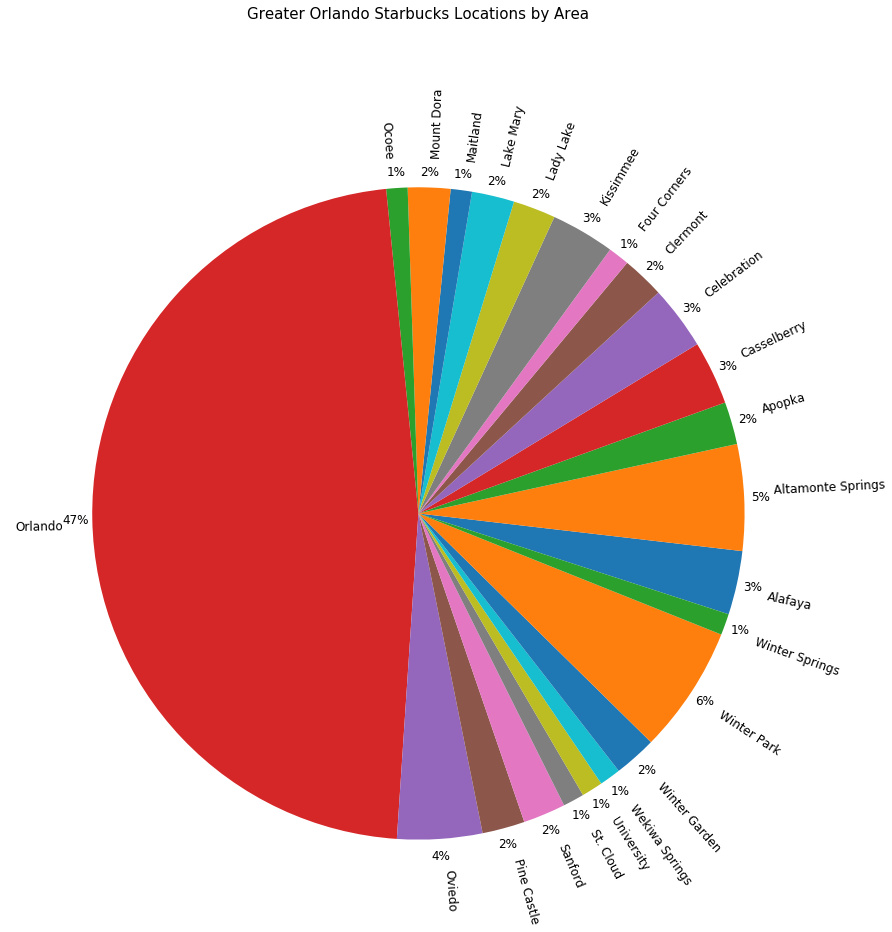

In [19]:
area_go = greater_orlando_by_area.reset_index()
area_go = area_go.loc[area_go["Count Starbucks"] > 0]

explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0]
plt.figure(figsize=(30,15))
# plot chart
ax1 = plt.subplot(aspect='equal')
area_go.plot(kind='pie', y = 'Count Starbucks', ax=ax1, autopct='%1.0f%%', pctdistance = 1.05, #explode = explode,
             startangle=-18, labels = area_go['index'], legend = False, fontsize=12, rotatelabels = 90, labeldistance = 1.09)

ax1.set_ylabel('')
ax1.set_title('Greater Orlando Starbucks Locations by Area', y=1.1, fontsize = 15)\

plt.savefig("Images/TestPie.png")

In [20]:
# Establish the bins 
population_bins = [0, 20000, 40000, 60000, 80000]
group_names = ["<20,000", "20,000-40,000", "40,000-60,000", "60,000-80,000"]

# Categorize the population based on the bins
greater_orlando_starbucks["Population Bins"] = pd.cut(greater_orlando_starbucks["Population"], population_bins, labels=group_names)

pop_bin_sbux = greater_orlando_starbucks.groupby(["Population Bins"]).sum()["Count Starbucks"]

# Assemble into data frame
pop_bin = pd.DataFrame({"Count Starbucks" : pop_bin_sbux})

pop_bin

,Count Starbucks
Population Bins,
"<20,000",25.0
"20,000-40,000",37.0
"40,000-60,000",26.0
"60,000-80,000",7.0


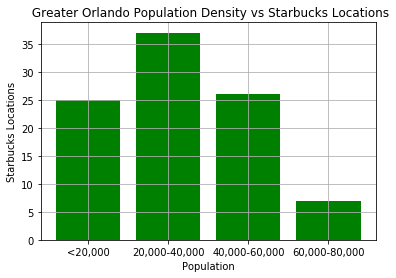

In [21]:
# Build bar graph
pop_x = pop_bin['Count Starbucks'] 

plt.bar(group_names, pop_x, color='g', alpha=1, align="center")

# Incorporate the other graph properties
plt.title(' Greater Orlando Population Density vs Starbucks Locations')
plt.ylabel('Starbucks Locations')
plt.xlabel('Population')
plt.grid(True)

In [22]:
# Establish the bins 
age_bins = [0, 30, 40, 50, 60, 70]
group_names = ["<30", "30-40", "40-50", "50-60", "60-70"]

# Categorize the population based on the bins
greater_orlando_starbucks["Age Bins"] = pd.cut(greater_orlando_starbucks["Median Age"], age_bins, labels=group_names)

age_bin_sbux = greater_orlando_starbucks.groupby(["Age Bins"]).sum()["Count Starbucks"]

# Assemble into data frame
age_bin = pd.DataFrame({"Count Starbucks" : age_bin_sbux})

age_bin

,Count Starbucks
Age Bins,
<30,2.0
30-40,58.0
40-50,27.0
50-60,0.0
60-70,8.0


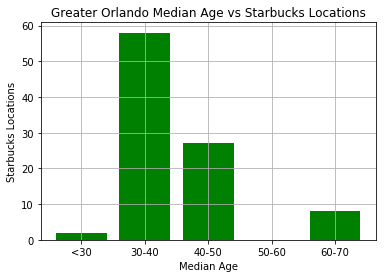

In [23]:
# Build bar graph
age_x = age_bin['Count Starbucks'] 

plt.bar(group_names, age_x, color='g', alpha=1, align="center")

# Incorporate the other graph properties
plt.title('Greater Orlando Median Age vs Starbucks Locations')
plt.ylabel('Starbucks Locations')
plt.xlabel('Median Age')
plt.grid(True)

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

x_vals = greater_orlando_starbucks['% Poverty Rate']
y_vals = greater_orlando_starbucks['Per Capita Income']
z_vals = greater_orlando_starbucks['Count Starbucks']

ax.scatter(x_vals, y_vals, z_vals)
ax.set_xlabel('% Poverty Rate')
ax.set_ylabel('Per Capita Income')
ax.set_zlabel('Count Starbucks')
ax.set_title('Greater Orlando Starbucks ')
ax.view_init(330)
pyplot.show()

NameError: name 'pyplot' is not defined

In [ ]:
# Build scatter plot
plt.scatter(greater_orlando_starbucks['% Poverty Rate'], greater_orlando_starbucks['Count Starbucks'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('% Poverty Rate vs Starbucks Locations')
plt.ylabel('Starbucks Locations')
plt.xlabel('% Poverty Rate')
plt.grid(True)

In [ ]:
# Build scatter plot
plt.scatter(greater_orlando_starbucks['Per Capita Income'], greater_orlando_starbucks['Count Starbucks'], marker='o', edgecolors = 'black')

# Incorporate the other graph properties
plt.title('Per Capita Income vs Starbucks Locations')
plt.ylabel('Starbucks Locations')
plt.xlabel('Per Capita Income')
plt.grid(True)

In [ ]:
opportunity_go = greater_orlando_starbucks.loc[greater_orlando_starbucks["% Poverty Rate"] < 20]
opportunity_go = opportunity_go.loc[opportunity_go["Per Capita Income"] > 20000]
opportunity_go = opportunity_go.loc[opportunity_go["Median Age"] < 40]
opportunity_go = opportunity_go.loc[opportunity_go["Count Starbucks"] == 0]
opportunity_go = opportunity_go.loc[opportunity_go["Population"] > 20000].reset_index(drop=True)

opportunity_go